# SMART ENERGY BUILDING

- Pauline BERNARD
- Laura CARLIER
- Wandille GUIROUVET
- Clara JENFT

Teaching program: SEM


Dans ce bureau d’études, nous chercherons à réaliser différentes étapes de la modélisation thermique d’un bâtiment simple. Notre bâtiment, modèle extrêmement simpliste et rudimentaire puisque ne contenant qu’une seule pièce, sera dans un premier temps testé en régime permanent, sans source de rayonnement ou de chauffage. 
Nous nous donnerons ensuite pour objectif de poursuivre l’étude en incorporant dans notre simulation les rayonnement humain à l’intérieur de la pièce, le chauffage de la pièce mais aussi les rayonnement solaire. Pour cette dernière information, nous incorporons les données météorologiques en fonction de la localisation.


## I.  Choix du bâtiment et établissement du modèle 

Dans cette section nous proposons le plan de notre bâtiment, ainsi que sa mise sous forme schématique. 
Bien que ce choix ait une influence sur l’ensemble du travail suivant, nous pouvons noter qu’il a finalement assez peu d’importance. En effet, si ce plan nous permet d’établir le schéma, qui lui-même nous permet d’établir les matrices sur lesquels nous allons nous appuyer pour la simulation, une modification du plan entraînerait simplement une modification des différents paramètres. La méthode que nous utiliserons dans le travail suivant est exactement la même en utilisant un plan légèrement différent.


**1. Plan détaillé de la pièce et de son entourage**

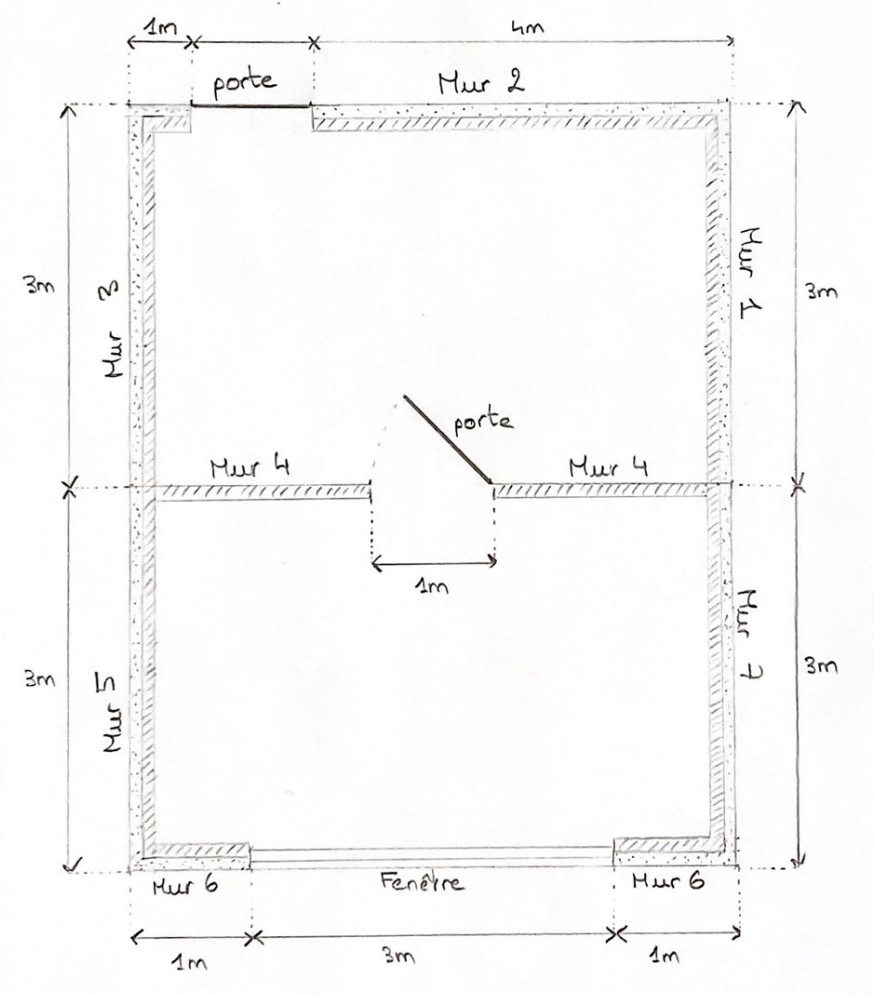

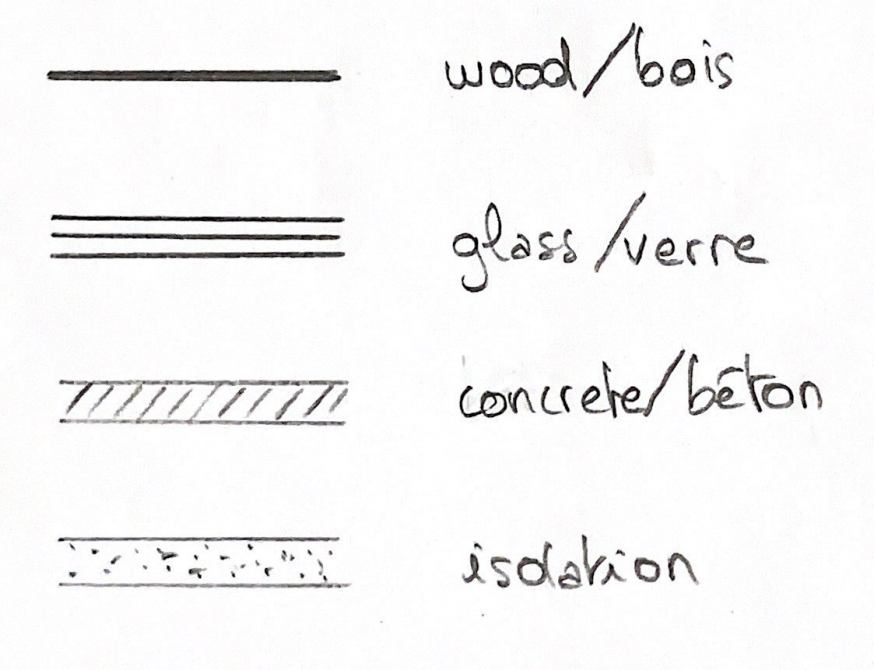

**2. Transcription schématique**
   
Il est possible d'établir une analogie entre la thermique et l'électricité. En effet, les relations de conductivité qui s'appliquent aux résistances dans le cadre d'un circuit électrique sont analogues aux relations de transfert thermique. On a ainsi donner l'analogie entre la loi d'Ohm et La conductivité thermique :

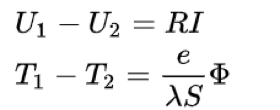

Nous pouvons donc utiliser cette analogie de manière à transcrire les transferts thermiques qui s'appliqueront à notre pièce en schéma électrique récapitulatif et complet. Nous obtenant de cette manière, le schéma suivant :

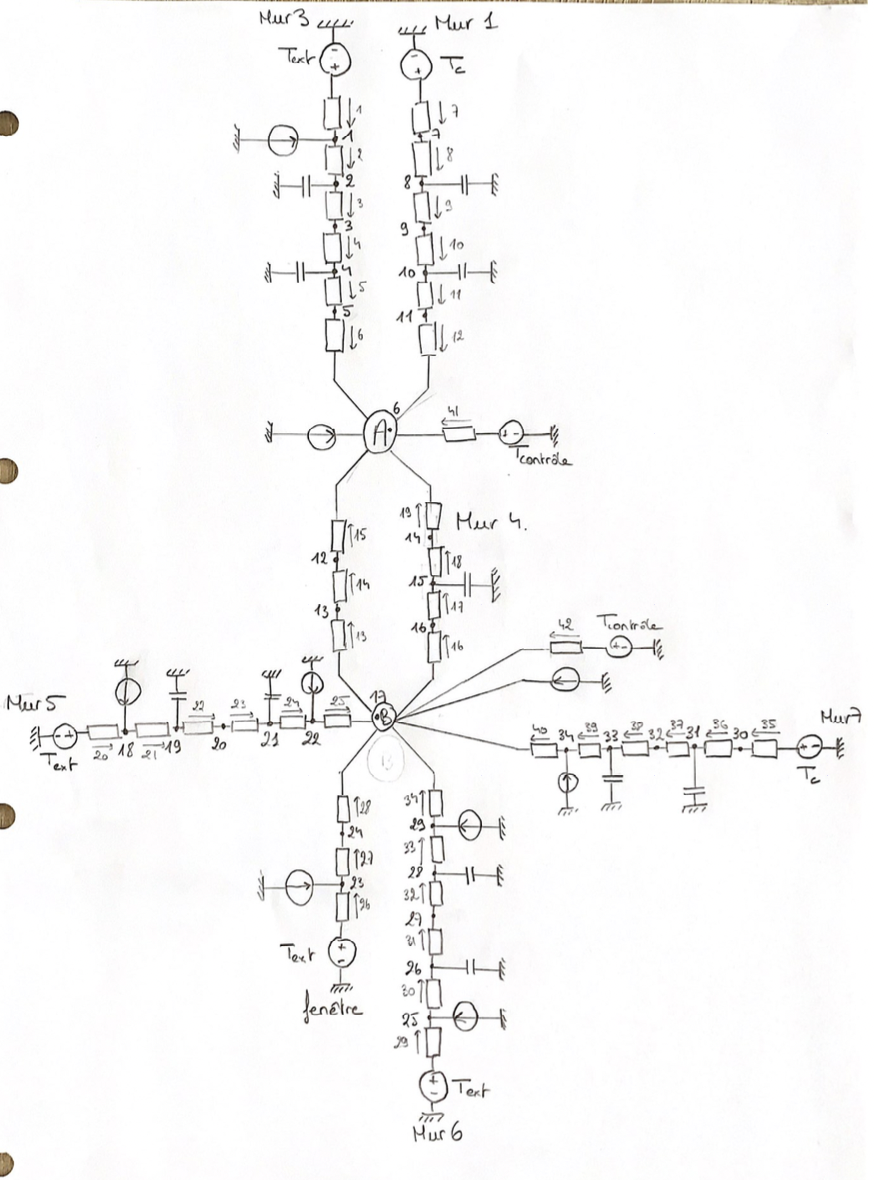

Chaque mur isolé comprend (en partant de l'extérieur et donc de la régulation de température toujours constante que nous considérons à l'extérieur de notre bâtiment) : 
- une résistance de convection, convection de l'air contre la paroi;
- une source de rayonnement; 
- une résistance de conduction, conduction dans l'isolant;
- une capacité;
- une autre résistance de conduction (ces trois derniers éléments sont répétés s'il y a deux matériaux collés l'un à l'autre);
- une source de rayonnement provenant de l'intérieur de la pièce;
- une résistance de convection.


**3. Choix des matériaux et de leurs différentes caractéristiques**


Nous présenterons ici les matériaux que nous avons choisis pour nos pièces.

Les murs extérieurs du bâtiment sont construit sur le modèle suivant :

Isolation en laine de verre; épaisseur : wis=0,15m
Béton ; épaisseur : wc=0,15m

Nous avons choisi de négliger le revêtement présent par-dessus la laine de verre en considérant que sa capacité thermique serait très faible.

La vitre présente est en simple vitrage de verre et a une épaisseur de : wg=0,01m

Le mur entre les deux pièces est en bois ; épaisseur : ww=0,1m

Les portes sont faites dans le même bois que les murs et ont une épaisseur de : wp=0,05m



Après recherches nous avons ainsi trouvé les caractéristiques suivantes :

| Matériau | Conductivité thermique | Capacité | Densité | Emissivité
|----------|----------|----------|----------|----------|
| Béton | 2 | 1000 | 2800 | 0,92 |
| Isolation | 0,03 | 700 | 16 | 0,07 |
| Verre | 1,2 | 1000 | 2500 | 0,92 |
| Bois | 0,15 | 1250 | 500 | 0,85 |



Grâce a la définition de toutes les caractéristiques propres au plan que nous avons élaboré, il est possible de réaliser le modèle physique correspondant puis de l'utiliser pour mettre en œuvre différentes modélisations thermiques.

Notons également que nous avons utilisé les hypothèses suivantes :

    •Température de surface uniforme sur chaque mur ou partie de mur.
    •Transfert de chaleur unidimensionnel dans chaque mur ou partie de mur.
    •Distribution diffuse du rayonnement solaire dans les pièces.
    •Appartement avec températures uniforme au sol et au plafond due à la présence d'autres appartements dans les étages environnant. Cette température est considéré équivalente à celle de notre pièce.
    •Tous les transferts de chaleur sont traités comme des phénomènes linéaires.



Dans la partie suivante, nous préparerons les matrices permettant de réaliser une modélisation en régime permanent et sans source de chaleur ni rayonnement solaire.

## II- Modèle thermique

### Théorie

Pour construire notre modèle nous nous appuyions sur les principes fondamentaux de la thermodynamique ainsi que sur les équivalence entre le modèle thermique et un modèle électrique.

Nous rappelons ici les principes de la thermodynamique appliqués à notre modèle.

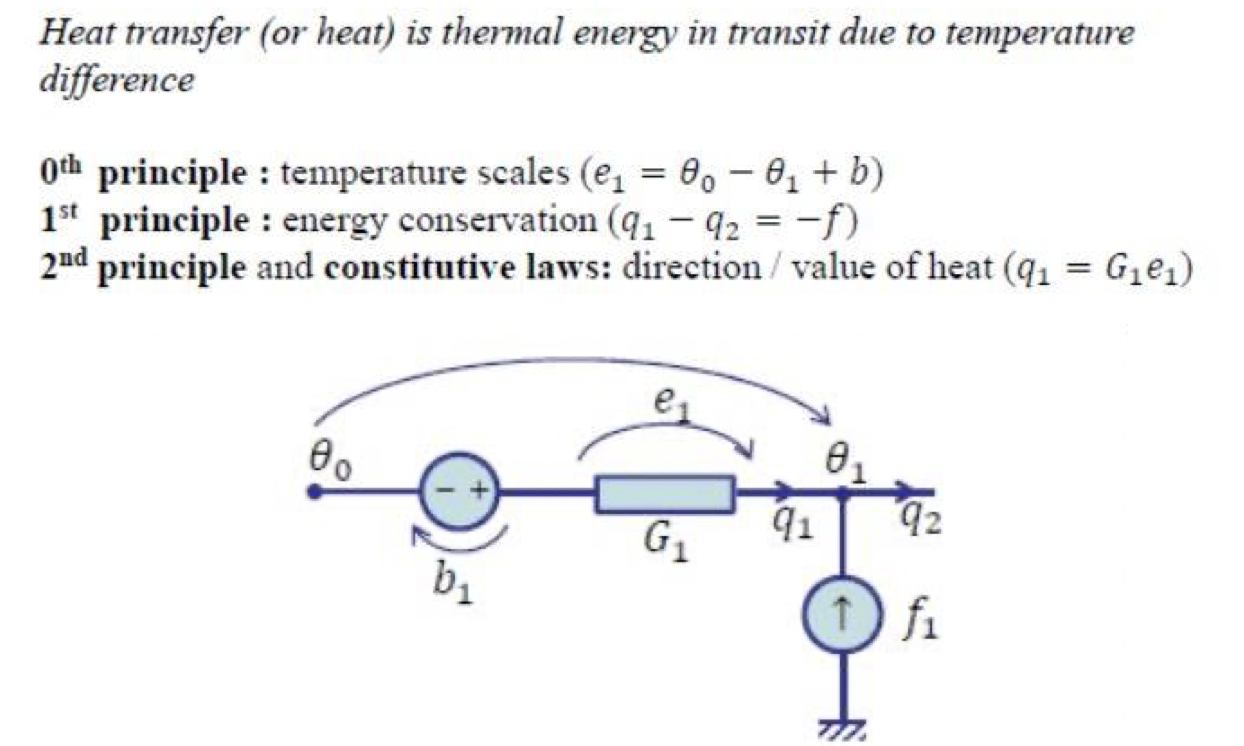

Nous allons à présent chercher à obtenir des équations linéaires avec des matrices que nous allons construire à partir de notre modèle schématique.






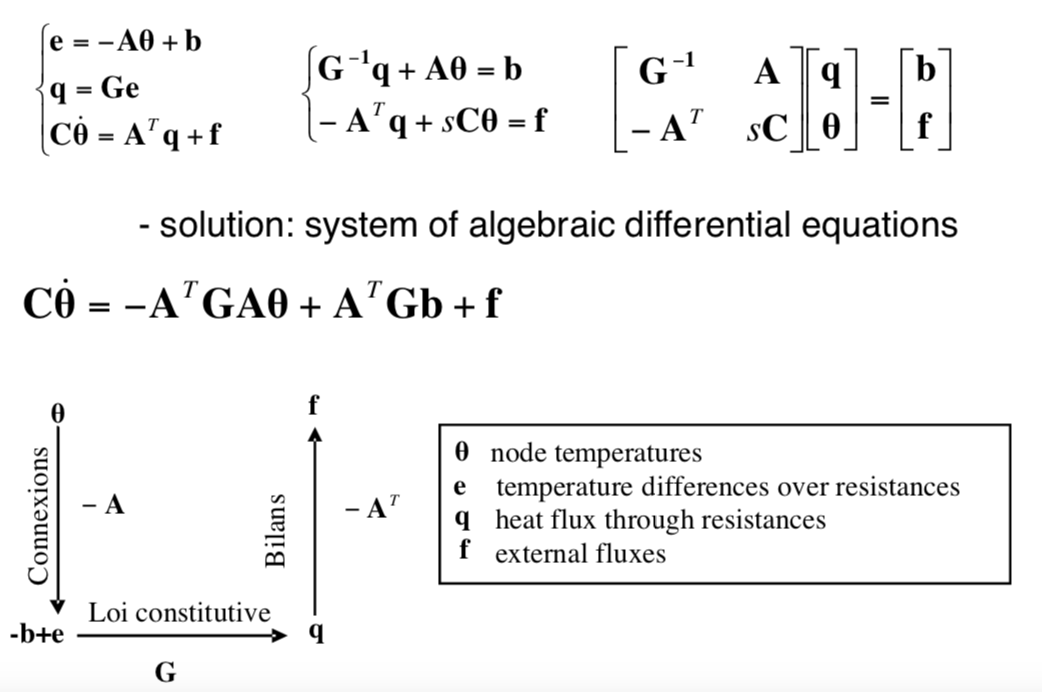



Ainsi nous allons commencer par construire la matrice A. Elle représente tous les flux e sortant et entrant dans les noeuds. Si la le flux entre dans le noeud, on le note 1, sinon -1. Ainsi notre matrice est la suivante :


In [3]:
import numpy as np

A = np.zeros((43, 35))
# MUR 3
A[1, 1] = 1
A[2, 1] = -1
A[2, 2] = 1
A[3, 2] = -1
A[3, 3] = 1
A[4, 3] = -1
A[4, 4] = 1
A[5, 4] = -1
A[5, 5] = 1
A[6, 5] = -1
A[6, 6] = 1

# MUR 1
A[7, 7] = 1
A[8, 7] = -1
A[8, 8] = 1
A[9, 8] = -1
A[9, 9] = 1
A[10, 9] = -1
A[10, 10] = 1
A[11, 10] = -1
A[11, 11] = 1
A[12, 11] = -1
A[12, 6] = 1

# PORTE 6
A[13, 17] = -1
A[13, 13] = 1
A[14, 13] = -1
A[14, 12] = 1
A[15, 12] = -1
A[15, 6] = 1

# MUR 4
A[16, 17]= -1
A[16, 16] = 1
A[17, 16] = -1
A[17, 15] = 1
A[18, 15] = -1
A[18, 14] = 1
A[19, 14] = -1
A[19, 6] = 1

# MUR 5
A[20, 18] = 1
A[21, 18] = -1
A[21, 19] = 1
A[22, 19] = -1
A[22, 20] = 1
A[23, 20] = -1
A[23, 21] = 1
A[24, 21] = -1
A[24, 22] = 1
A[25, 22] = -1
A[25, 17] = 1

# Fenetre
A[26, 23] = 1
A[27, 23] = -1
A[27, 24] = 1
A[28, 24] = -1
A[28, 17] = 1

# MUR 6
A[29, 25] = 1
A[30, 25] = -1
A[30, 26] = 1
A[31, 26] = -1
A[31, 27] = 1
A[32, 27] = -1
A[32, 28] = 1
A[33, 28] = -1
A[33, 29] = 1
A[34, 29] = -1
A[34, 17] = 1

# MUR 7
A[35, 30] = 1
A[36, 30] = -1
A[36, 31] = 1
A[37, 31] = -1
A[37, 32] = 1
A[38, 32] = -1
A[38, 33] = 1
A[39, 33] = -1
A[39, 34] = 1
A[40, 34] = -1
A[40, 17] = 1
A[41, 6] = 1
A[42, 17] = 1

Ap = A[1:, 1:]
ApT = np.transpose(Ap)

print(Ap)

[[ 1.  0.  0. ...  0.  0.  0.]
 [-1.  1.  0. ...  0.  0.  0.]
 [ 0. -1.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0. -1.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


Puis la matrice B qui représente toutes les températures extérieures :

In [6]:
import numpy as np

B = np.zeros(42)
Text= 20

B[0] = Text
B[6] = Text
B[19] = Text
B[25] = Text
B[28] = Text
B[34] = Text

print(B)

[20.  0.  0.  0.  0.  0. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0. 20.  0.  0.  0.  0.  0. 20.  0.  0. 20.  0.  0.  0.  0.  0. 20.  0.
  0.  0.  0.  0.  0.  0.]


La matrice f représente les sources de chaleurs entrant dans les noeuds et la matrice C représente les capacités qui rentrent dans les noeuds.

In [9]:

import numpy as np

F = np.zeros(34)
C = np.zeros(42)

#nombre de personne
nbp=1
phipersonne = 80 #flux de 80watt par personne en moyenne 

#irradiance moyenne solaire sur l'année 
irradiance = 200

# Données
cw= 1250
cg = 1000
cc = 1000
cis = 700

# Température
Text = 15
Tc = 15

#emissivité
epsilonc=0.92
epsilonis=0.07
epsilonw = 0.85
epsilong = 0.92

#Phi
wc=0.15
wis=0.2
wg=0.01
ww=0.1
wp=0.05

lambdac=2
lambdais=0.03
lambdag=1.2
lambdaw=0.15

rhoc=2800
rhois=16
rhog=2500
rhow=500

S1=S7=S3=S5=Sf=7.5
S6=5
S4=10
S2=10
Sp=2.5

hint=8
hext=25

F[0] = irradiance*epsilonis*S3
F[5] = phipersonne*nbp
F[16] = phipersonne*nbp
F[17] = irradiance*epsilonis*S5
F[21] = irradiance*epsilonc*S5
F[22] = irradiance*epsilong*Sf
F[24] = irradiance*epsilonis*S6
F[28] = irradiance*epsilonc*S6
F[33] = irradiance*epsilonc*S7


C[1] = rhois*cis*wis*S3
C[3] = rhoc*cc*wc*S3
C[18] = rhois*cis*wis*S5
C[20] = rhoc*cc*wc*S5
C[25] = rhois*cis*wis*S6
C[27] = rhoc*cc*wc*S6
C[30] = rhois*cis*wis*S7
C[32] = rhoc*cc*wc*S7
C[7] = rhois*cis*wis*S1
C[9] = rhoc*cc*wc*S1
C[14] = rhow*cw*ww*S4

print(C)
print(F)

[      0.   16800.       0. 3150000.       0.       0.       0.   16800.
       0. 3150000.       0.       0.       0.       0.  625000.       0.
       0.       0.   16800.       0. 3150000.       0.       0.       0.
       0.   11200.       0. 2100000.       0.       0.   16800.       0.
 3150000.       0.       0.       0.       0.       0.       0.       0.
       0.       0.]
[ 105.    0.    0.    0.    0.   80.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.   80.  105.    0.    0.    0. 1380. 1380.    0.
   70.    0.    0.    0.  920.    0.    0.    0.    0. 1380.]


La matrice G est construite comme suit car elle regroupe les conductances thermiques, soit de conduction, soit de convection. Celles ci dépendent des matériaux utilisés et des surfaces. La valeur de la conductance pour les échanges par convection est g=h*S (avec h le coefficient de conduction thermique en W.m-2.K-1). Pour les échanges par conduction, la valeur de la conductance est h=lambda*S/w (w l'épaisseur en m et lambda la conductivité thermique en W.m-1.K-1)

In [13]:
import numpy as np


G=np.zeros((42,42))


# Données
cw= 1250
cg = 1000
cc = 1000
cis = 700

# Température
Text = 15
Tc = 15

#emissivité
epsilonc=0.92
epsilonis=0.07
epsilonw = 0.85
epsilong = 0.92

#Phi


wc=0.15
wis=0.2
wg=0.01
ww=0.1
wp=0.05

lambdac=2
lambdais=0.03
lambdag=1.2
lambdaw=0.15

rhoc=2800
rhois=16
rhog=2500
rhow=500

S1=S7=S3=S5=Sf=7.5
S6=5
S4=10
S2=10
Sp=2.5

hint=8
hext=25

#Mur3        
G[0][0]=hext*S1
G[1][1]=lambdais*S3/wis
G[2][2]=lambdais*S3/wis
G[3][3]=lambdac*S3/wc
G[4][4]=lambdac*S3/wc
G[5][5]=hint*S3

#Mur 1
G[6][6]=hint*S1
G[7][7]=lambdais*S1/wis
G[8][8]=lambdais*S1/wis
G[9][9]=lambdac*S1/wc
G[10][10]=lambdac*S1/wc
G[11][11]=hint*S1

#Porte b 
G[12][12]=hint*Sp
G[13][13]=lambdaw*Sp/wp
G[14][14]=hint*Sp

#Cloison mur 4
G[15][15]=hint*S4
G[16][16]=lambdaw*S4/ww
G[17][17]=lambdaw*S4/ww
G[18][18]=hint*S4

#Mur 5
G[19][19]=hext*S5
G[20][20]=lambdais*S5/wis
G[21][21]=lambdais*S5/wis
G[22][22]=lambdac*S5/wc
G[23][23]=lambdac*S5/wc
G[24][24]=hint*S5

#Fenetre
G[25][25]=hext*Sf
G[26][26]=lambdag*Sf/wg
G[27][27]=hint*Sf

#Mur 6
G[28][28]=hext*S6
G[29][29]=lambdais*S6/wis
G[30][30]=lambdais*S6/wis
G[31][31]=lambdac*S6/wc
G[32][32]=lambdac*S6/wc
G[33][33]=hint*S6

#Mur 7
G[34][34]=hint*S7
G[35][35]=lambdais*S7/wis
G[36][36]=lambdais*S7/wis
G[37][37]=lambdac*S7/wc
G[38][38]=lambdac*S7/wc
G[39][39]=hint*S7


print(G)

[[187.5     0.      0.    ...   0.      0.      0.   ]
 [  0.      1.125   0.    ...   0.      0.      0.   ]
 [  0.      0.      1.125 ...   0.      0.      0.   ]
 ...
 [  0.      0.      0.    ...  60.      0.      0.   ]
 [  0.      0.      0.    ...   0.      0.      0.   ]
 [  0.      0.      0.    ...   0.      0.      0.   ]]


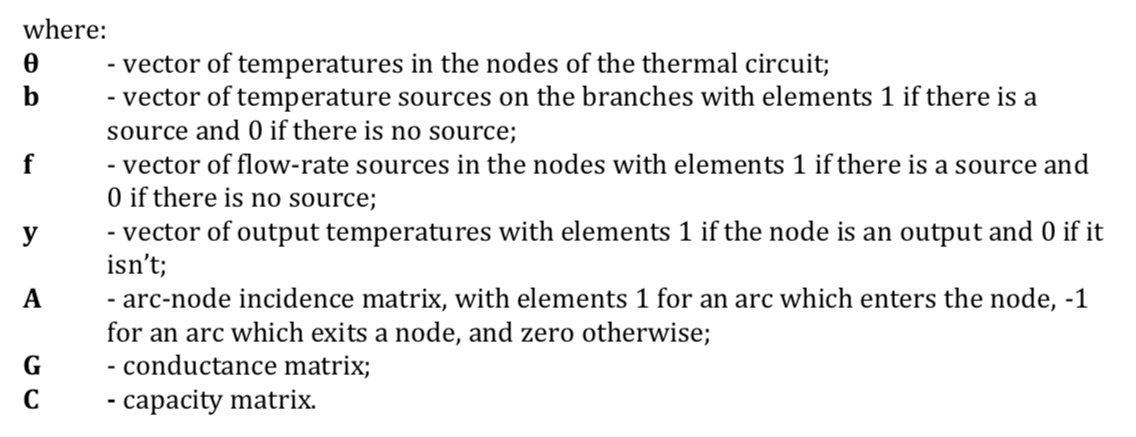

## III. Régime stationnaire 

Lors du régime stationnaire nous pouvons faire les hypothèses suivantes :
- Le contrôleur n'est pas actif : Kp→0
- La température extérieure est : Text = 10
- Que toutes les sources de débit sont nulles (soit f=0)

Ainsi notre équations devient :

0= -(A^T)GA+(A^T)Gb

En effet nous ne prenons pas en compte en régime infini les variations des sources de chaleurs et au bout d'un moment la température intérieure est égale à la température extérieur et homogène dans toutes les pièces. 

Ainsi nous avons la solution suivante :

In [12]:
# matrice thermique
import numpy as np

A = np.zeros((43, 35))
F = np.zeros(34)
C = np.zeros(42)
B = np.zeros(42)
theta = np.zeros(42)
G=np.zeros((42,42))

#nombre de personne
nbp=1
phipersonne = 80 #flux de 80watt par personne en moyenne 

#irradiance moyenne solaire sur l'année 
irradiance = 200

# Données
cw= 1250
cg = 1000
cc = 1000
cis = 700

# Température
Text = 20
Tc = 15

#emissivité
epsilonc=0.92
epsilonis=0.07
epsilonw = 0.85
epsilong = 0.92

#Phi


wc=0.15
wis=0.2
wg=0.01
ww=0.1
wp=0.05

lambdac=2
lambdais=0.03
lambdag=1.2
lambdaw=0.15

rhoc=2800
rhois=16
rhog=2500
rhow=500

S1=S7=S3=S5=Sf=7.5
S6=5
S4=10
S2=10
Sp=2.5

hint=8
hext=25

#Mur3        
G[0][0]=hext*S1
G[1][1]=lambdais*S3/wis
G[2][2]=lambdais*S3/wis
G[3][3]=lambdac*S3/wc
G[4][4]=lambdac*S3/wc
G[5][5]=hint*S3

#Mur 1
G[6][6]=hint*S1
G[7][7]=lambdais*S1/wis
G[8][8]=lambdais*S1/wis
G[9][9]=lambdac*S1/wc
G[10][10]=lambdac*S1/wc
G[11][11]=hint*S1

#Porte b 
G[12][12]=hint*Sp
G[13][13]=lambdaw*Sp/wp
G[14][14]=hint*Sp

#Cloison mur 4
G[15][15]=hint*S4
G[16][16]=lambdaw*S4/ww
G[17][17]=lambdaw*S4/ww
G[18][18]=hint*S4

#Mur 5
G[19][19]=hext*S5
G[20][20]=lambdais*S5/wis
G[21][21]=lambdais*S5/wis
G[22][22]=lambdac*S5/wc
G[23][23]=lambdac*S5/wc
G[24][24]=hint*S5

#Fenetre
G[25][25]=hext*Sf
G[26][26]=lambdag*Sf/wg
G[27][27]=hint*Sf

#Mur 6
G[28][28]=hext*S6
G[29][29]=lambdais*S6/wis
G[30][30]=lambdais*S6/wis
G[31][31]=lambdac*S6/wc
G[32][32]=lambdac*S6/wc
G[33][33]=hint*S6

#Mur 7
G[34][34]=hint*S7
G[35][35]=lambdais*S7/wis
G[36][36]=lambdais*S7/wis
G[37][37]=lambdac*S7/wc
G[38][38]=lambdac*S7/wc
G[39][39]=hint*S7

# MUR 3
A[1, 1] = 1
A[2, 1] = -1
A[2, 2] = 1
A[3, 2] = -1
A[3, 3] = 1
A[4, 3] = -1
A[4, 4] = 1
A[5, 4] = -1
A[5, 5] = 1
A[6, 5] = -1
A[6, 6] = 1

# MUR 1
A[7, 7] = 1
A[8, 7] = -1
A[8, 8] = 1
A[9, 8] = -1
A[9, 9] = 1
A[10, 9] = -1
A[10, 10] = 1
A[11, 10] = -1
A[11, 11] = 1
A[12, 11] = -1
A[12, 6] = 1

# PORTE 6
A[13, 17] = -1
A[13, 13] = 1
A[14, 13] = -1
A[14, 12] = 1
A[15, 12] = -1
A[15, 6] = 1

# MUR 4
A[16, 17]= -1
A[16, 16] = 1
A[17, 16] = -1
A[17, 15] = 1
A[18, 15] = -1
A[18, 14] = 1
A[19, 14] = -1
A[19, 6] = 1

# MUR 5
A[20, 18] = 1
A[21, 18] = -1
A[21, 19] = 1
A[22, 19] = -1
A[22, 20] = 1
A[23, 20] = -1
A[23, 21] = 1
A[24, 21] = -1
A[24, 22] = 1
A[25, 22] = -1
A[25, 17] = 1

# Fenetre
A[26, 23] = 1
A[27, 23] = -1
A[27, 24] = 1
A[28, 24] = -1
A[28, 17] = 1

# MUR 6
A[29, 25] = 1
A[30, 25] = -1
A[30, 26] = 1
A[31, 26] = -1
A[31, 27] = 1
A[32, 27] = -1
A[32, 28] = 1
A[33, 28] = -1
A[33, 29] = 1
A[34, 29] = -1
A[34, 17] = 1

# MUR 7
A[35, 30] = 1
A[36, 30] = -1
A[36, 31] = 1
A[37, 31] = -1
A[37, 32] = 1
A[38, 32] = -1
A[38, 33] = 1
A[39, 33] = -1
A[39, 34] = 1
A[40, 34] = -1
A[40, 17] = 1
A[41, 6] = 1
A[42, 17] = 1

Ap = A[1:, 1:]
ApT = np.transpose(Ap)


F[0] = irradiance*epsilonis*S3
F[5] = phipersonne*nbp
F[16] = phipersonne*nbp
F[17] = irradiance*epsilonis*S5
F[21] = irradiance*epsilonc*S5
F[22] = irradiance*epsilong*Sf
F[24] = irradiance*epsilonis*S6
F[28] = irradiance*epsilonc*S6
F[33] = irradiance*epsilonc*S7


C[1] = rhois*cis*wis*S3
C[3] = rhoc*cc*wc*S3
C[18] = rhois*cis*wis*S5
C[20] = rhoc*cc*wc*S5
C[25] = rhois*cis*wis*S6
C[27] = rhoc*cc*wc*S6
C[30] = rhois*cis*wis*S7
C[32] = rhoc*cc*wc*S7
C[7] = rhois*cis*wis*S1
C[9] = rhoc*cc*wc*S1
C[14] = rhow*cw*ww*S4

B[0] = Text
B[6] = Text
B[19] = Text
B[25] = Text
B[28] = Text
B[34] = Text

#diag
Gd=np.diag(G)
Cd=np.diag(C)

theta = np.linalg.inv(Ap.T @ G @ Ap) @( Ap.T @ G @ B)
print(theta)

[20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]


## III. Régime non stationnaire 

Nous prenons cette fois en compte des sources de chaleurs qui agissent au cours du temps. Ainsi nous devons résoudre le problème différement. Pour cela nous passons notre modèle d'équations différentielles algébriques sous des équations et des représentations d'états avec des entrées et des sorties. 

Ainsi nos matrices deviennent : 
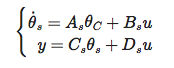

- Avec théta S qui est un vecteur contenant les variables d'états tel que la température des noeuds au niveau des capacités (donc taille égale au nombre de capacité thermiques dans le réseau) 
- Puis u qui est le vecteur des entrées (de dimension dim u)égale au nombre de sources (de température et de flux de chaleur) du réseau thermique
- y est le vecteur de sorties représenté par un sous-ensemble du vecteur θ représentant les nœuds de température qui nous intéressent 
- As est la matrice d'état 
- Bs est la matrice d'entrée 
- Cs est la matrice de sortie 
- Ds est la matrice d'alimentation (ou d'anticipation)

Afin d'obtenir la représentation de l'espace d'état, outre les matrices As, Gs, Cs, on doit spécifier :
- Dans le vecteur b les branches qui contiennent des sources de température par 1 et les autres branches par 0
- Dans le vecteur f les nœuds qui contiennent des sources de flux de chaleur par 1 et les autres nœuds par 0
- Dans le vecteur y les noeuds pour lesquels les températures sont des sorties par 1 et les autres noeuds par 0

Ainsi nous avions commencé à le faire mais nous n'avons pas pu finir : 

In [16]:
import numpy as np

b=np.zeros(10)
f=np.zeros(34)
y = np.ones(34)
u = np.hstack([b[np.nonzero(b)], f[np.nonzero(f)]])

#Définition de b en entrée :

b[0]=1
b[1]=0
b[2]=1
b[3]=0
b[4]=1
b[5]=1
b[6]=1
b[7]=1
b[8]=1
b[9]=1

f[0]=1
f[5]=1
f[16]=1
f[17]=1
f[21]=1
f[22]=1
f[24]=1
f[28]=1
f[33]=1

y[5]=1
y[16]=1

print("La matrice B est :")
print(b)
print("La matrice F est :")
print(f)
print("La matrice Y est :")
print(y)

La matrice B est :
[1. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
La matrice F est :
[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
La matrice Y est :
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Nous n'avons pas eu le temps de finir, il nous manque la matrice u (qui ontient b et f), pour nous permettre de faire un système d'état correct. Puis il faudrait que nous établissions notre système d'erreur un pas de temps et un temps de stabilisation pour obtenir un graphique comme suit : 

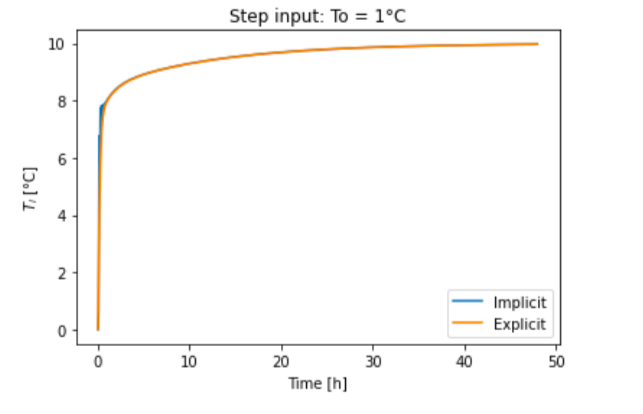

Puis les conditions météo tel que la variation de l'intensité du rayonnement solaire selon la journée et l'inclinaison du soleil sur nos différentes paroie pourrait être des pristes d'améliorations et de précisions importantes à prendre en compte. 